### Introduction.
The aim of this project is to analyze a data set of the global average sea level change since 1880. We are going to predict the sea level change through year 2050.

Import the libraries.

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from scipy.stats import linregress
style.use('ggplot')

In [2]:
# read the epa-sea-level.csv dataset
sea_data = pd.read_csv('epa-sea-level.csv')
sea_data.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
sea_data['Year'][0] #starting year.

1880

In [4]:
sea_data.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


epa-sea-level dataset contains global average sea level change since 1880 to 2013.

### Describing the dataset.
epa-sea-level dataset contains cumilative changes in the sea level for the world's ocean since 1880. It is based on a combination of long-term tide guage measurments and recent satellite measurments.

Satellite data are based on measured sea level. The long-term tide guage data include a small correcton factor due to the size and shape changes of the oceans slowly overtime.

all the data in the dataset are recorded as inches.

**lower bound** is the smallest value that would round up to the estimated value.  
**upper bound** is the smallest value that would round up to the next estimated value. [bbc.co.uk](https://www.bbc.co.uk/bitesize/guides/zscq6yc/revision/6)  

In the `CSIRO Adjusted Sea Level` column, contains the cumilative changes in the sea level measured by CSIRO (Commonwealth Scientific and Industrial Research Organization) and `NOAA Adjusted Sea Level` column, contains the National oceanic and Atmospheric Administration measured sea level changes.

Data source:  
https://datahub.io/core/sea-level-rise

### Visualize the data.
The below scatterplot is created with the `Year` as the x-axis and `CSIRO Adjusted Sea Level` as the y-axis.

In [5]:
# x-axis
x = sea_data['Year']

# y-axis
y = sea_data['CSIRO Adjusted Sea Level']

Scatter plot can be visualize as follows.

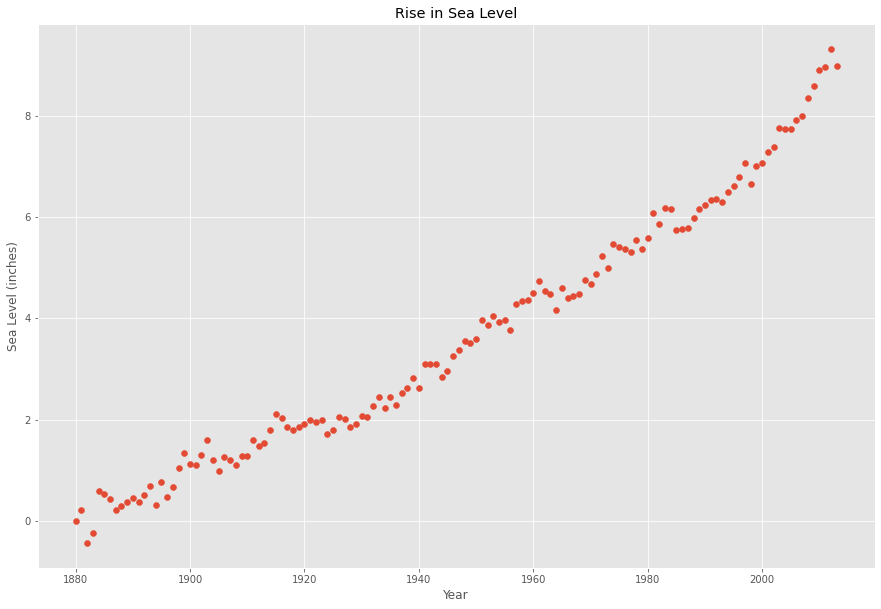

In [6]:
# setting the figure size
plt.figure(figsize=(15,10))

# set the plot title
plt.title("Rise in Sea Level")

# set the x-axis label
plt.xlabel("Year")

# set the y-axis label
plt.ylabel("Sea Level (inches)")

# plot the data
plt.scatter(x, y)

*figure 01*

In [7]:
# get the slope and y-intercept from the x and y axis data
# the x-axis data that consider to calculate this slope and intercept is 1880-2013. 
data = scipy.stats.linregress(x,y)
slope = data.slope
intercept = data.intercept

print("slope:",slope," intercept:", intercept)

slope: 0.0630445840121348  intercept: -119.06594196773978


In [8]:
#x-axis data points between regression line.
x_end = np.arange(sea_data['Year'][0],2051)

#Creating the regression line.
regression_line = (slope*x_end)+intercept

In [9]:
# 2050 average sea level.
y_predict = (slope*2050) + intercept
print("Predicted sea level for 2050: ", y_predict)

Predicted sea level for 2050:  10.175455257136548


Text(2050, 10.175455257136548, '(2050, 10.175455257136548)')

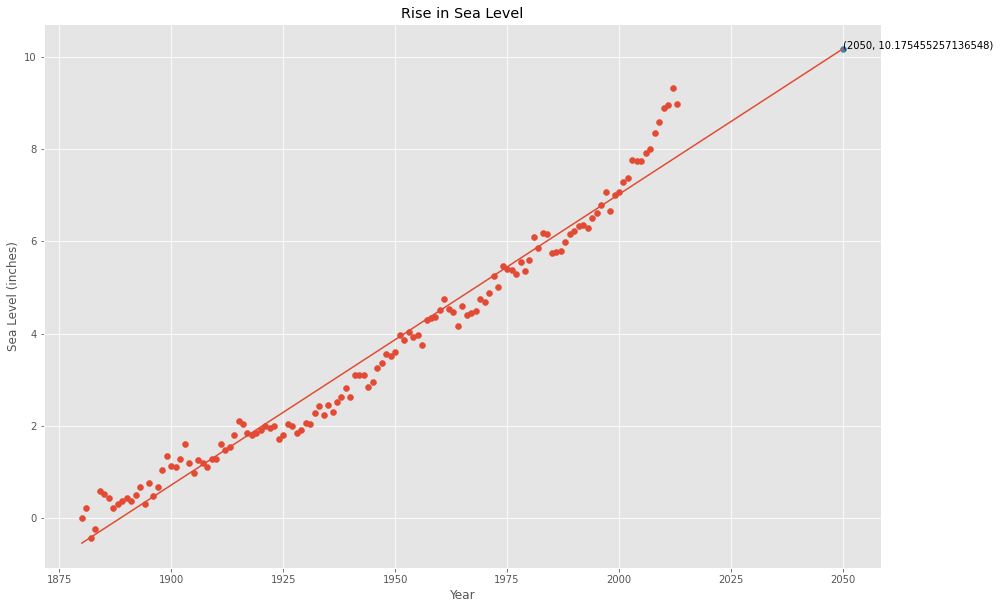

In [10]:
# setting the figure size
plt.figure(figsize=(15,10))

# set the plot title
plt.title("Rise in Sea Level")

# set the x-axis label
plt.xlabel("Year")

# set the y-axis label
plt.ylabel("Sea Level (inches)")

# plot the data
plt.scatter(x, y)

# regression line.
plt.plot(x_end, regression_line)

# 2050 predicted sea level.
plt.scatter(2050, y_predict)

plt.annotate("(2050, 10.175455257136548)",(2050, y_predict))

*figure 02*

Predict the Sea Level (inches) from the best fit line and plot the value in the above scatter plot.

The below scatter plot created from the 2000-2013 CSIRO Adjusted Sea Level data. We consider this data range specially due to the above scatter plot.(*figure 01*)

Acoording to *figure 01* scatter plot, Sea Level got much higher than 1880 - 2000 after the year 2000.

In [11]:
# filter data
sea_data_new = sea_data[(sea_data['Year']>=2000)]
sea_data_new.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [12]:
# new x axis data
x1 = sea_data_new['Year']

# new y axis data
y1 = sea_data_new['CSIRO Adjusted Sea Level']

In [13]:
# new slope and intercept from the above data.
data_new = scipy.stats.linregress(x1, y1)
slope_new = data_new.slope
intercept_new = data_new.intercept

print("New slope: ", slope_new, "New intercept: ", intercept_new)

New slope:  0.16642727333186808 New intercept:  -325.79346680596467


In [14]:
#x-axis data points between regression line.
x_end_new = np.arange(2000,2051)

#Creating the regression line.
regression_line_new = (slope_new*x_end_new)+intercept_new

In [15]:
# 2050 average sea level (2000-2013 data based)
y_predict_new = (slope_new*2050) + intercept_new
print("Predicted sea level for 2050: ", y_predict_new)

Predicted sea level for 2050:  15.382443524364874


Text(2050, 15.382443524364874, '(2050, 15.38)')

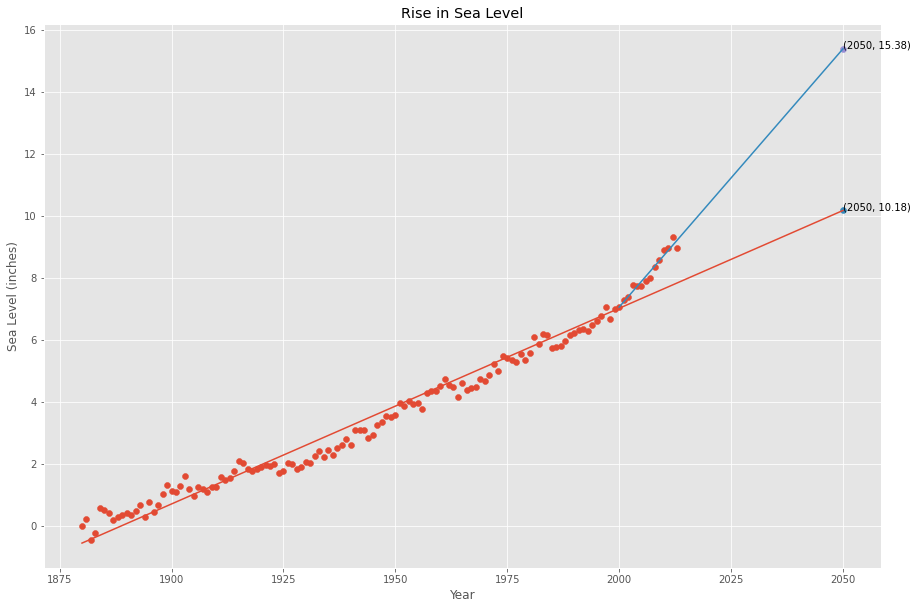

In [16]:
# setting the figure size
plt.figure(figsize=(15,10))

# set the plot title
plt.title("Rise in Sea Level")

# set the x-axis label
plt.xlabel("Year")

# set the y-axis label
plt.ylabel("Sea Level (inches)")

# plot the data
plt.scatter(x, y)

# regression line.
plt.plot(x_end, regression_line)

# regression line 2.
plt.plot(x_end_new, regression_line_new)

# 2050 predicted sea level.
plt.scatter(2050, y_predict)

# 2050 predicted sea level (2000-2013 based data.)
plt.scatter(2050, y_predict_new)

plt.annotate("(2050, 10.18)",(2050, y_predict))
plt.annotate("(2050, 15.38)",(2050, y_predict_new))